In [76]:
#import libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [77]:
#sns datasets
print(sns.get_dataset_names(),end=" ")

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic'] 

In [3]:
#load and read dataset
df = sns.load_dataset("tips")
df[:4]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2


In [4]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

## ONEHOT Encoding

In [15]:
df[["sex"]][:6]

,sex
0,Female
1,Male
2,Male
3,Male
4,Female
5,Male


In [45]:
#get the name of the color palletes
print(plt.colormaps(), end=" ")

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', '

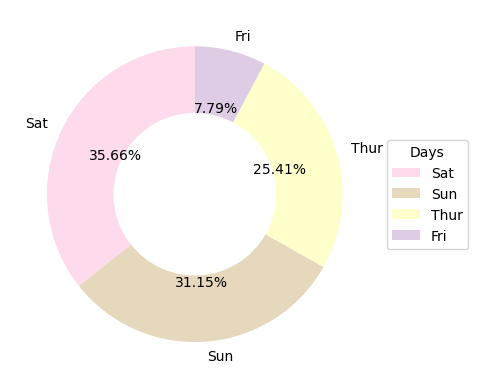

In [109]:
#donut chart on the days
day_values = df["day"].value_counts(ascending=False)
label = ["Sat", "Sun", "Thur", "Fri"]
color = sns.color_palette("Pastel1_r")
plt.pie(day_values, autopct="%.2f%%", colors=color, labels=label, startangle=90, wedgeprops=dict(width=.45))
plt.legend(title= "Days", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1));


In [35]:
#encode the cat variables
#encode gender

ohe =OneHotEncoder(sparse_output=False, dtype="int") 

gender_ohe = ohe.fit_transform(df[["sex"]])
pd.DataFrame(gender_ohe, columns=["Sex_Female", "Sex_Male"])[:6]

,Sex_Female,Sex_Male
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0
5,0,1


In [29]:
#always use drop first arguement to avoid maulticoll..

df

ohe =OneHotEncoder(sparse_output=False, dtype="int", drop='first') 
gender_one = pd.DataFrame(ohe.fit_transform(df[["sex"]]))
pd.DataFrame(gender_one)

,0
0,0
1,1
2,1
3,1
4,0
...,...
239,1
240,0
241,1
242,1


In [32]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Get Dummies

get dummies is similar to onehot encoder, the difference is that it is from pandas, while OHE comes from sklearn library.

In [44]:
#create dummies for day variable
day_dummie = pd.get_dummies(df["day"], dtype="int", drop_first=True)
day_dummie

,Fri,Sat,Sun
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
239,0,1,0
240,0,1,0
241,0,1,0
242,0,1,0


## Label Encoder

It is used when there's an order/ hirarchy

In [62]:
#example of label encoder
lec = LabelEncoder()
day_le =lec.fit_transform(df[["day"]])
day_le

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3])

In [63]:
#ONE encode all cat columns
cat_coln = df.select_dtypes("category")
cat_coln

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner
...,...,...,...,...
239,Male,No,Sat,Dinner
240,Female,Yes,Sat,Dinner
241,Male,Yes,Sat,Dinner
242,Male,No,Sat,Dinner


In [67]:
#encode
encoded_col= pd.get_dummies(cat_coln, dtype= 'int', drop_first=True)
encoded_col

,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,1,1,0,0,1,1
1,0,1,0,0,1,1
2,0,1,0,0,1,1
3,0,1,0,0,1,1
4,1,1,0,0,1,1
...,...,...,...,...,...,...
239,0,1,0,1,0,1
240,1,0,0,1,0,1
241,0,0,0,1,0,1
242,0,1,0,1,0,1


In [72]:
#merge the encoded coln with the original dataset

merged_df = pd.concat([df,encoded_col],axis=1)
merged_df

,total_bill,tip,sex,smoker,day,time,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,Female,No,Sun,Dinner,2,1,1,0,0,1,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1,0,0,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1,0,0,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1,0,0,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0,1,0,1,0,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,1,0,0,1,0,1
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0,0,0,1,0,1
242,17.82,1.75,Male,No,Sat,Dinner,2,0,1,0,1,0,1
